# III. Lists, Arrays and Numpy : Iterative Algorithms &mdash; Part II

Import `math`:

In [1]:
import math

## Last Week with Newton

You might remember the star of last week's lesson, **Newton's method** for root finding. Recall that, in order to solve the real equation
$$f(x)=0,$$
we used the iteration
$$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}.$$


The steps involve:

- Take an initial guess for the solution, call it $x_0$. 
- Compute the update $x_{n+1}$ from the previous step $x_n$ using the iteration rule.
- Given a tolerance $\epsilon$, repeat until $\|x_{n+1}-x_{n}\|<\epsilon$.

Last week we solved the polynomial equation $p(x)=0$, for 
$$p(x)=x^3-2x^2-11x+12.$$
We can factor $p$ as
$$p(x)=(x − 4)(x − 1)(x + 3),$$
which yields the roots $x=1, x=4, x=-3$. We can find these numerically:

In [2]:
def p(x):
    return x**3-2*x**2-11*x+12

In [3]:
def pPrime(x):
    return 3*x**2-4*x-11

In [4]:
def newton(f, fPrime, x0, tol):
    x = x0
    k = 0
    
    difference = 10*tol
    while difference > tol:
        xNext = x - f(x)/fPrime(x)
        difference = abs(xNext - x)

        x = xNext
        k = k+1
        
    return x

In [5]:
newton(p, pPrime, -5, 1.0e-15)

-3.0

In [6]:
newton(p, pPrime, 0, 1.0e-15)

1.0

In [7]:
newton(p, pPrime, 5, 1.0e-15)

4.0

## Solving Complex Problems

What happens if we apply Newton's method to a polynomial with complex roots? Take, for instance, the polynomial
$$r(z)=z^3-1,\quad z\in\mathbb{C}$$
which gives the cube roots of unity. Over the reals,
$$r(x)=x^3-1,\quad x\in\mathbb{R}$$
$r$ only has one root, $x=1$. 

In [8]:
def r(x):
    return x**3-1

In [9]:
def rPrime(x):
    return 3*x**2

In [10]:
newton(r, rPrime, -10, 1.0e-15)

1.0

In [11]:
newton(r, rPrime, -1, 1.0e-15)

1.0

In [12]:
newton(r, rPrime, 1, 1.0e-15)

1.0

In [13]:
newton(r, rPrime, 10, 1.0e-15)

1.0

How can we find the complex roots of the polynomial? As in turns out, complex numbers work in python just as well! We can easily define a complex number:

In [14]:
complex(1,3)

(1+3j)

We can also do the usual operations on complex numbers just as on reals.

- Addition:

In [15]:
complex(1,2) + complex(2,3)

(3+5j)

- Subtraction:

In [16]:
complex(1,2) - complex(3,4)

(-2-2j)

- Multiplication:

In [17]:
complex(1,2) * complex(3,4)

(-5+10j)

- Division:

In [18]:
complex(1,2) / complex(3,4)

(0.44+0.08j)

- Exponentiation:

In [19]:
complex(1,2) ** 2

(-3+4j)

And, since all the maths works the same, **most of the code that works for real numbers works for complex numbers as well**.

We can evaluate the polynomial $r$ at a complex number:

In [20]:
r(complex(0,1))

(-1-1j)

And, indeed, we can execute Newton's method with a complex initial guess! If we use a real number in complex format (something like `comple(-1,0)`), we recover the same root as before. Define it as `z1`:

In [21]:
z1 = newton(r, rPrime, complex(-1,0), 1.0e-15)
print(z1)

(1+0j)


However, if we pick the right starting point...

In [22]:
z2 = newton(r, rPrime, complex(-1,1), 1.0e-15)
print(z2)

(-0.5+0.8660254037844387j)


In [23]:
z3 = newton(r, rPrime, complex(-1,-1), 1.0e-15)
print(z3)

(-0.5-0.8660254037844387j)


We can &mdash; and should &mdash; check that the three roots are indeed roots of the polynomial, as well as cube roots of unity:

In [24]:
z1**3, z2**3, z3**3

((1+0j),
 (1.0000000000000002-1.1102230246251565e-16j),
 (1.0000000000000002+1.1102230246251565e-16j))

In [25]:
r(z1), r(z2), r(z3)

(0j,
 (2.220446049250313e-16-1.1102230246251565e-16j),
 (2.220446049250313e-16+1.1102230246251565e-16j))

It appears there is some error, but this is consistent &mdash; the method only computes approximations to the roots after all.

## Mapping the Roots

![map][map]

[map]: https://i.pinimg.com/236x/f7/3e/e5/f73ee5517d2ff9cdbd5b17a32feecb09--treasure-maps-treasure-map-tattoo.jpg "Treasure Map"

Here is an "innocent" question. Which parts of the complex plane map to which root? The answer might be complicated, so we have to find a systematic way of checking a series of starting values.

### Lists and Arrays

While we technically have everything we need to do this already, we will be using some new tools which make the work much easier. First we will use the `numpy` module, which is extremely useful for any numerical exploration in Python.

However, the name `numpy` is rather long, and typing every time we call one of its functions can be tiring. Instead of running `import numpy`, we can run `import numpy as np`, which gives the module an *alias*.

In [26]:
import numpy as np

This imports the module `numpy` under the name `np`.

In [27]:
np

<module 'numpy' from '/usr/local/lib/python3.6/dist-packages/numpy/__init__.py'>

In order to study what happens to all the initial guesses systematically, we have to store them in an ordered manner. We can use lists for this:

In [28]:
[3,5,7]

[3, 5, 7]

We can access elements of the list using square brackets after the variable name. Remember to start counting from zero!

In [29]:
myList = [3,5,7]
myList[0]

3

In [30]:
myList[1]

5

In [31]:
myList[2]

7

There are many helpful functions in `numpy` to construct collections like these. For instance, `zeros` returns a collection of zeros:

In [32]:
np.zeros(3)

array([0., 0., 0.])

Notice the function returns an `array`, rather than a list. The `array` type is specific to `numpy`, but elements can be accessed just like in a list. A list can be turned into an `array` by using the `array` function:

In [33]:
myArray = np.array([3,5,7])
myArray[0]

3

In [34]:
myArray[1]

5

In [35]:
myArray[2]

7

Lists and arrays are extremely useful tools, and it is important that we learn how to work with them. One of the fundamental techniques &mdash; exclusive to Python &mdash; is the **list comprehension**.

Observe the following code:

In [36]:
[k**2 for k in range(0,10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

We know that `range(0,10)` returns the integers from $0$ to $9$. Observe the code inside the brackets, `k**2 for k in range(0,10)`. This expression is taking each element in the list `range(0,10)`, squaring it, and returning the collection as a list.

As it turns out, we can use any transformation we like over any list we choose. For instance, we can double each entry of `myList`:

In [37]:
[2*x for x in myList]

[6, 10, 14]

Ideally, we would write this as multiplication, `2 * [1,-3,17,-10]`. However, if we try that:

In [38]:
2 * myList

[3, 5, 7, 3, 5, 7]

Lists do not work with mathematical arithmetic. On the other hand, the `array` type does!

In [39]:
2 * np.array(myList)

array([ 6, 10, 14])

### A Complex Grid

We are ready to start working with arrays to achieve our goal. A function that will be useful is `linspace`, which gives an array of equally spaced points between two limits.

In [40]:
np.linspace(0,1,21)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

We can define arrays which contain the real and imaginary parts of the initial guesses, given a `scale` and a `number` of points:

In [41]:
scale = 2
number = 2

In [42]:
xArray = np.linspace(-scale, scale, number)
yArray = np.linspace(-scale, scale, number)

We can now use a list comprehension to assemble an `array` of complex numbers. In fact, we have to use **two** comprehensions. One over `xArray`, and one over `yArray`:

In [43]:
Z = np.array([[complex(x,y) for y in yArray] for x in xArray])
print(Z)

[[-2.-2.j -2.+2.j]
 [ 2.-2.j  2.+2.j]]


What we obtain is a nested array: an array of arrays. Think of it as a matrix!

We can map this matrix to another matrix using list comprehensions again, though again we need two of them. For instance, in we can double Z:

In [44]:
np.array([[2*z for z in row] for row in Z])

array([[-4.-4.j, -4.+4.j],
       [ 4.-4.j,  4.+4.j]])

Of course, we could have used multiplication (`2*Z`) as well.

Instead of multiplying each number, we can use the values in `Z` as the initial value for Newton's method:

In [45]:
roots = np.array([[newton(r, rPrime, z, 1.0e-15) for z in row] for row in Z])
print(roots)

[[-0.5-0.8660254j -0.5+0.8660254j]
 [ 1. +0.j         1. +0.j       ]]


### The Bigger Picture

We are almost done! We now can compute the corresponding root for an array of intial guesses. Before we increase the number of initial guesses, we should design a way of visualising the data. The best way to display the information we will gather is a plot over the complex plane which shows the argument (the phase, the angle) of the complex root returned by Newton's method. Conveniently, the module `cmath` has a `phase` function which returns the angle of a complex number. First we import the module:

In [46]:
import cmath

And now we compute the phase of the roots:

In [47]:
phase = np.array([[cmath.phase(z) for z in row] for row in roots])
print(phase)

[[-2.0943951  2.0943951]
 [ 0.         0.       ]]


All that is left is plotting the information. We will study plotting in detail later on. For now, here is a function that will plot the data nicely:

In [48]:
import matplotlib.pyplot as plt

def plotArray(x,y,Z):
    plt.figure(figsize=(5, 5))
    extent=(x[0], x[-1], y[0], y[-1])
    plt.imshow(np.transpose(Z), extent=extent, cmap="viridis")

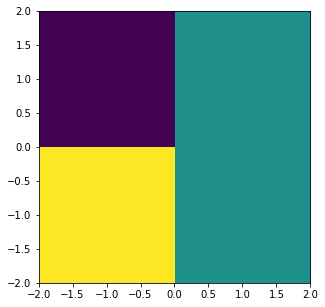

In [49]:
plotArray(xArray, yArray, phase)

To finish, we will write a function which does all of this automatically. Once the function is working, feel free to play with the `scale` and the `number` parameters to get a better picture! This is known as a [Newton Fractal](https://en.wikipedia.org/wiki/Newton_fractal).

In [50]:
def newtonFractal(scale, number):
    xArray = np.linspace(-scale, scale, number)
    yArray = np.linspace(-scale, scale, number)

    Z = np.array([[complex(x,y) for y in yArray] for x in xArray])
    roots = np.array([[newton(r, rPrime, z, 1.0e-15) for z in row] for row in Z])
    phase = np.array([[cmath.phase(z) for z in row] for row in roots])
    plotArray(xArray, yArray, phase)

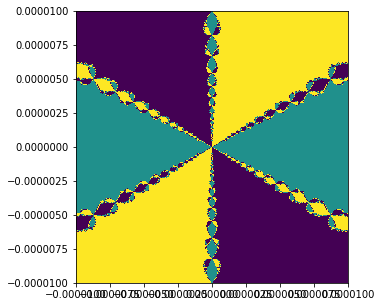

In [51]:
newtonFractal(0.00001,300)

### Other Complex-Plane Fractals

There are other iterative processes which yield fractals when computed over the complex plane. The two classical examples are the Mandelbrot and Julia sets.

#### The Mandelbrot Set

[The Mandelbrot Set](https://en.wikipedia.org/wiki/Mandelbrot_set) is a fractal set which can be computed by studying the iteration
$$z_{n+1}=z_{n}^2+c,$$
where $z_0=0$ and $c$ is a point on the complex plane. In theory, the points in the fractal are those values of $c$ for which the iteration remains bounded for ever.

In practice, we compute a finite number of iterations and check whether $|z_n|>2$ at some point. The `mandelbrot` function takes a `complex` value `c`, iterates using a `for` loop spanning `kMax` iterations, and returns either the first value of `k` such that $|z_k|>2$ or `kMax` if the iteration remains bounded.

In [52]:
def mandelbrot(c):
    z = complex(0,0)
    
    kMax = 100
    
    for k in range(0, kMax):
        if abs(z) > 2:
            return k
        
        z = z**2 + c
    
    return kMax

Having defined the iteration, we can define the `mandelbrotFractal` function which is extremely similar to `newtonFractal`. Since `mandelbrot` returns an integer value we don't need to process the output before plotting, though instead of plotting `mandelbrot(z)` we plot `math.log(mandelbrot(z)+1)` because it makes the fractal look a bit nicer!

In [53]:
def mandelbrotFractal(number, scale=2, centre=complex(0,0)):
    xArray = np.linspace(-scale, scale, number) + centre.real
    yArray = np.linspace(-scale, scale, number) + centre.imag

    Z = np.array([[complex(x,y) for y in yArray] for x in xArray])
    values = np.array([[math.log(mandelbrot(z)+1) for z in row] for row in Z])
    
    plotArray(xArray, yArray, values)

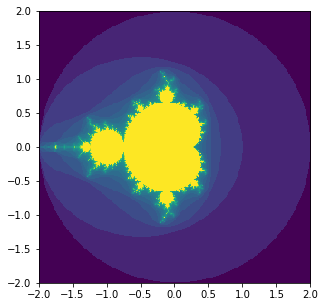

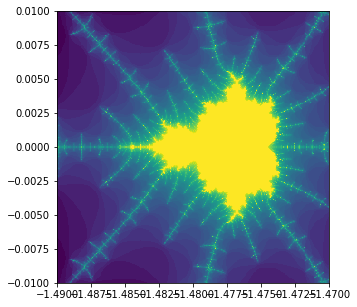

In [54]:
mandelbrotFractal(300)
mandelbrotFractal(300, scale=0.01, centre=complex(-1.48,0))

#### The Julia Set

[The Julia Set](https://en.wikipedia.org/wiki/Julia_set) is very similar to the Mandelbrot set. We use the same iteration,
$$z_{n+1}=z_{n}^2+c,$$
but this time $c$ is a fixed value for the fractal and $z_0$ is chosen as a point of the complex plane, rather than $0$. The implementation is almost identical!

In [55]:
def julia(z0, c):
    z = z0
    
    kMax = 100
    
    for k in range(0, kMax):
        if abs(z) > 2:
            return k
        
        z = z**2 + c
    
    return kMax

In [56]:
def juliaFractal(number, c=complex(0,0), scale=2, centre=complex(0,0)):
    xArray = np.linspace(-scale, scale, number) + centre.real
    yArray = np.linspace(-scale, scale, number) + centre.imag

    Z = np.array([[complex(x,y) for y in yArray] for x in xArray])
    values = np.array([[math.log(julia(z, c)+1) for z in row] for row in Z])
    
    plotArray(xArray, yArray, values)

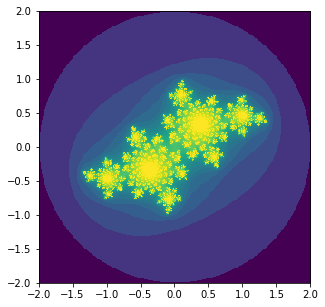

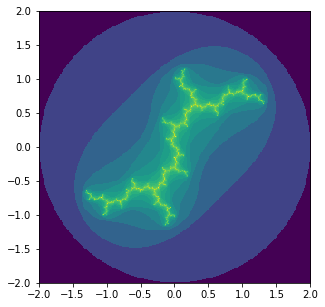

In [57]:
juliaFractal(300, c=complex(-0.4,0.6))
juliaFractal(300, c=complex(0,1))